In [2]:
#Install packages
pip install pybaseball

Note: you may need to restart the kernel to use updated packages.


In [6]:
#Import packages
from pybaseball import statcast
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
#Import data for 2020 season
data = statcast(start_dt='2020-07-22', end_dt='2020-09-28')

This is a large query, it may take a moment to complete
Completed sub-query from 2020-07-22 to 2020-07-27
Completed sub-query from 2020-07-28 to 2020-08-02
Completed sub-query from 2020-08-03 to 2020-08-08
Completed sub-query from 2020-08-09 to 2020-08-14
Completed sub-query from 2020-08-15 to 2020-08-20
Completed sub-query from 2020-08-21 to 2020-08-26
Completed sub-query from 2020-08-27 to 2020-09-01
Completed sub-query from 2020-09-02 to 2020-09-07
Completed sub-query from 2020-09-08 to 2020-09-13
Completed sub-query from 2020-09-14 to 2020-09-19
Completed sub-query from 2020-09-20 to 2020-09-25
Completed sub-query from 2020-09-26 to 2020-09-28


<BarContainer object of 11 artists>

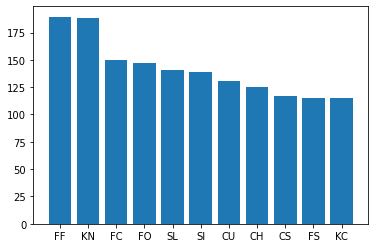

In [90]:
#data.head(2)
#data.dtypes
#data.index
#data.pitch_type.value_counts()
#data.groupby('pitch_type')['launch_speed'].mean().sort_values(ascending = False)
#data['launch_speed'].describe()
#data.groupby('pitch_type')['launch_angle'].mean().sort_values(ascending = False)

#Distance hit by pitch type
#type_dist = data[["pitch_type", "hit_distance_sc"]]
#print(type_dist[1000:1060])
#type_dist['hit_distance_sc'].hist()
type_dist = data.groupby('pitch_type')['hit_distance_sc'].mean().sort_values(ascending = False)
pitches = type_dist.index
distances = type_dist.values
plt.bar(pitches, distances)

#plt.plot(data.groupby('pitch_type')['hit_distance_sc'].mean().sort_values(ascending = False))
#data.groupby('pitch_type')['launch_speed_angle']

In [107]:
#Estimated batting average by pitch name
#data.groupby('pitch_type')['estimated_ba_using_speedangle'].value_counts()
data.groupby('pitch_name')['estimated_ba_using_speedangle'].mean().sort_values(ascending = False)

pitch_name
Knuckleball        0.360500
4-Seam Fastball    0.339832
Sinker             0.335129
Knuckle Curve      0.334146
Curveball          0.326174
Cutter             0.324870
Changeup           0.315632
Split-Finger       0.315117
Slider             0.309111
Forkball           0.010500
Name: estimated_ba_using_speedangle, dtype: float64

In [106]:
#Exit Velocity by pitch name
data.groupby('pitch_name')['launch_speed'].mean().sort_values(ascending = False)

pitch_name
4-Seam Fastball    84.306442
Sinker             84.226024
Knuckle Curve      82.296184
Cutter             81.954047
Split-Finger       81.422344
Slider             81.162149
Curveball          80.507766
Changeup           80.462188
Forkball           75.900000
Knuckleball        70.220000
Name: launch_speed, dtype: float64

In [105]:
#Launch angle py pitch name
data.groupby('pitch_name')['launch_angle'].mean().sort_values(ascending = False)

pitch_name
Forkball           61.000000
Knuckleball        48.800000
4-Seam Fastball    28.630082
Cutter             15.482554
Slider             13.185218
Sinker              9.883324
Curveball           8.625407
Changeup            6.169461
Split-Finger        2.614993
Knuckle Curve       0.655868
Name: launch_angle, dtype: float64

In [157]:
#Percentage of balls hit on the barrel of the bat by pitch type
#data.groupby('pitch_name')['launch_speed_angle'].value_counts()
#data['launch_speed_angle'].value_counts()
barrels = data[data.launch_speed_angle == 6].pitch_name.value_counts()
nonbarrels = data[data.launch_speed_angle != 6].pitch_name.value_counts()
p_barrels = barrels/nonbarrels
print(p_barrels.sort_values(ascending = False))

Knuckleball        0.045455
4-Seam Fastball    0.015987
Cutter             0.014061
Sinker             0.013220
Changeup           0.011441
Split-Finger       0.010676
Slider             0.010236
Knuckle Curve      0.009806
Curveball          0.008227
Forkball                NaN
Name: pitch_name, dtype: float64


<BarContainer object of 67 artists>

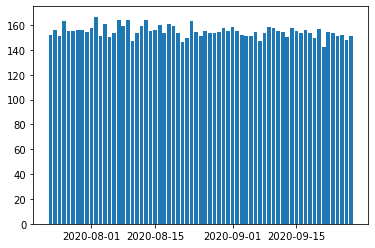

In [92]:
#Distance balls hit by date
date_dist = data.groupby('game_date')['hit_distance_sc'].mean().sort_values(ascending = False)
dates = date_dist.index
distances2 = date_dist.values
plt.bar(dates, distances2)

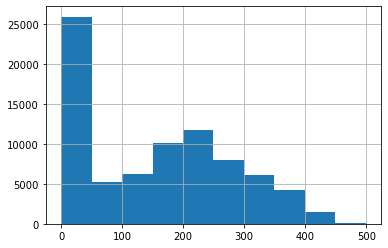

In [77]:
data['hit_distance_sc'].describe()
data['hit_distance_sc'].hist()

<BarContainer object of 30 artists>

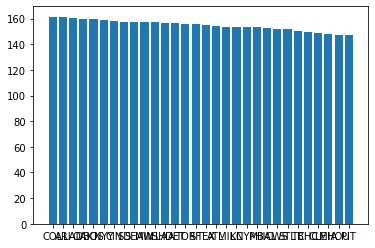

In [91]:
#Distance by ballpark
park_dist = data.groupby('home_team')['hit_distance_sc'].mean().sort_values(ascending = False)
parks = park_dist.index
distances3 = park_dist.values
plt.bar(parks, distances3)

In [ ]:
#Code for Data Pull from the Proposal

# from pybaseball import statcast
import pandas as pd

In [ ]:
#Import 2015 Data
data15 = statcast(start_dt='2015-04-05', end_dt='2015-11-02')
data15.to_csv("statcast_15.csv")
#Import 2016 Data
data16 = statcast(start_dt='2016-04-03', end_dt='2016-11-02')
data16.to_csv("statcast_16.csv")
#Import 2017 Data
data17 = statcast(start_dt='2017-04-02', end_dt='2017-11-01')
data17.to_csv("statcast_17.csv")
#Import 2018 Data:
data18 = statcast(start_dt='2018-03-29', end_dt='2018-10-28')
data18.to_csv("statcast_18.csv")
#Import 2019 Data:
data19 = statcast(start_dt='2019-03-20', end_dt='2019-10-30')
data19.to_csv("statcast_19.csv")
#Import 2020 Data:
data20 = statcast(start_dt='2020-07-23', end_dt='2020-10-27')
data20.to_csv("statcast_20.csv")

In [ ]:
#Get pitching stats:
from pybaseball import pitching_stats
pitching_data = pitching_stats(2015, 2020)
pitching_data.to_csv("pitching_data_15_to_20.csv")

In [ ]:
#Get Batting stats:
from pybaseball import batting_stats
batting_data = batting_stats(2015, 2020)
batting_data.to_csv("batting_data_15_to_20.csv")